In [1]:
# !git clone git@github.com:alexeygrigorev/clothing-dataset-small

In [2]:
# !pip install tensorflow

In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img

import numpy as np

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

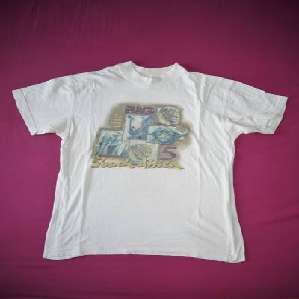

In [3]:
path = './clothing-dataset-small/train/t-shirt'
name = '0b1cc7a6-be78-45e6-be22-2ad00b107328.jpg'

full_path = f'{path}/{name}'

# target sizes taken by tensorflow is -> 299x299, 224x224, 150x150

img = load_img(full_path, target_size=(299,299))
img

In [4]:
np.array(img).shape

(299, 299, 3)

Pre-trained convolution neural networks

In [5]:
# we are using Xception -> which is pre-trained on some data
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

In [6]:
# weights -> means which pre-trained model should we use
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [7]:
# model.predict() -> takes in multiple images so need to make an array and then pass
X = np.array([img])
X.shape

(1, 299, 299, 3)

In [8]:
X = preprocess_input(X)

In [9]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [10]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.9743637),
  ('n04370456', 'sweatshirt', 0.0013636556),
  ('n03710637', 'maillot', 0.0013395341),
  ('n03188531', 'diaper', 0.0004141331),
  ('n03877472', 'pajama', 0.0002819296)]]

### CNN -> Convolutional Neural Networks

for more info: 
https://cs231n.github.io/

In [12]:
# input -> Concolutional layers -> vector representation -> dense layers -> output

### Transfer learning

<img src="attachment:02909b9d-b21b-4739-8bcb-721337dfaa74.png" width="500" height="500">

1. Read data with ImageDataGenerator
2. Train Xception on smaller images 150x150

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [13]:
# batch size -> how many images at once
train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train', target_size=(150,150), batch_size = 32)

Found 3068 images belonging to 10 classes.


In [14]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [ ]:
# to check whats inside or how it generates, we use generator, which returns X(features/images) and y(labels)
X, y = next(train_ds)
X

array([[[[ 0.27843142, -0.02745098, -0.25490195],
         [ 0.33333337,  0.05882359, -0.17647058],
         [ 0.2941177 ,  0.05098045, -0.19215685],
         ...,
         [ 0.6313726 ,  0.2941177 , -0.04313725],
         [ 0.5921569 ,  0.254902  , -0.08235294],
         [ 0.6       ,  0.26274514, -0.0745098 ]],

        [[ 0.28627455, -0.01960784, -0.24705881],
         [ 0.33333337,  0.05882359, -0.17647058],
         [ 0.30980396,  0.06666672, -0.17647058],
         ...,
         [ 0.6313726 ,  0.2941177 , -0.04313725],
         [ 0.5921569 ,  0.254902  , -0.08235294],
         [ 0.6       ,  0.26274514, -0.0745098 ]],

        [[ 0.26274514, -0.04313725, -0.27058822],
         [ 0.33333337,  0.05882359, -0.17647058],
         [ 0.30980396,  0.06666672, -0.17647058],
         ...,
         [ 0.6156863 ,  0.27843142, -0.05882353],
         [ 0.58431375,  0.24705887, -0.09019607],
         [ 0.6       ,  0.26274514, -0.0745098 ]],

        ...,

        [[-0.12156862, -0.4352941 , -0

In [16]:
# it does one hot encoding, so first column is dress and the last is t-shirt
# this is also known as multiclass classification
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [17]:
val_gen = ImageDataGenerator(preprocessing_function= preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/train', target_size=(150,150), batch_size = 32, shuffle= False
)

Found 3068 images belonging to 10 classes.


<!-- 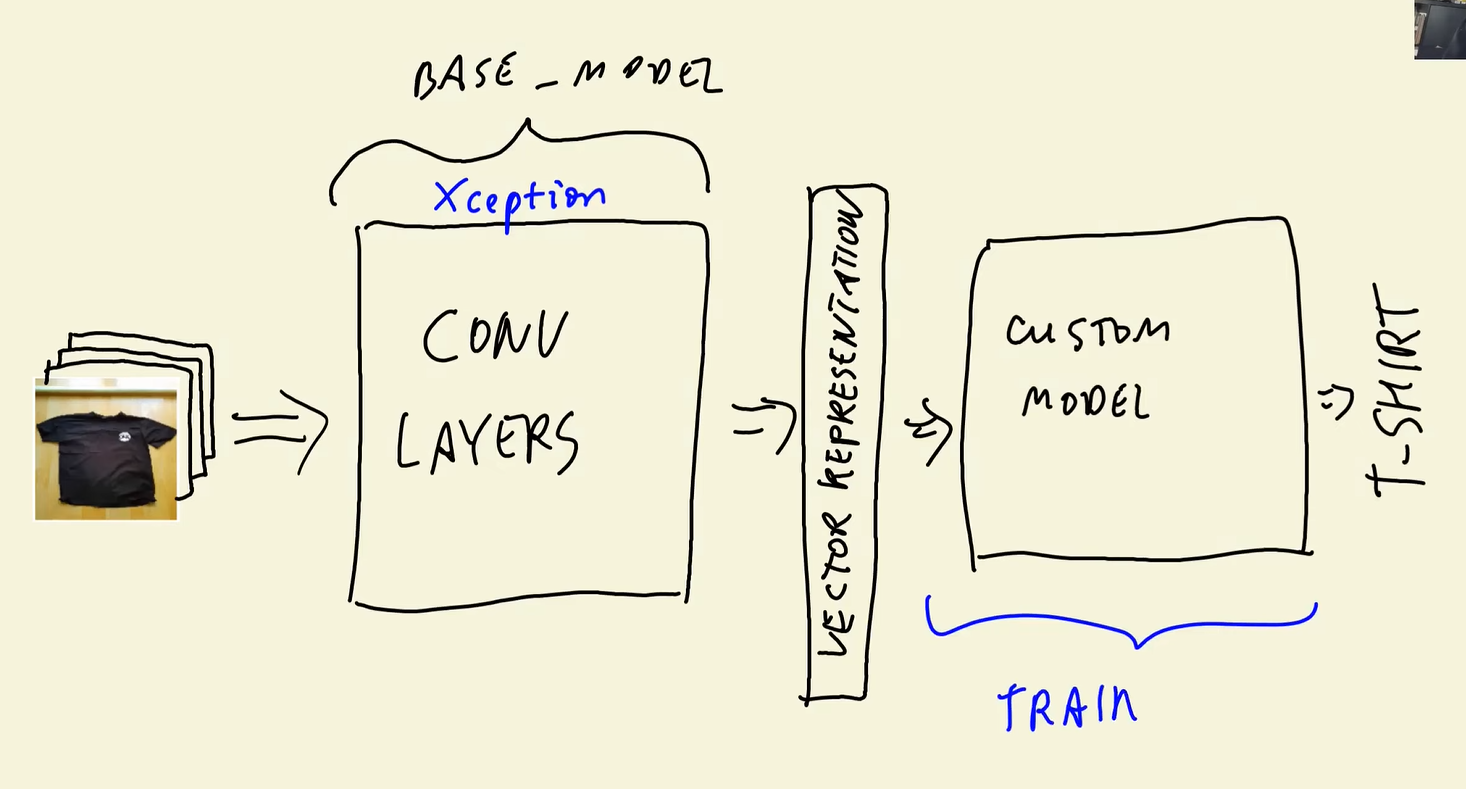 -->
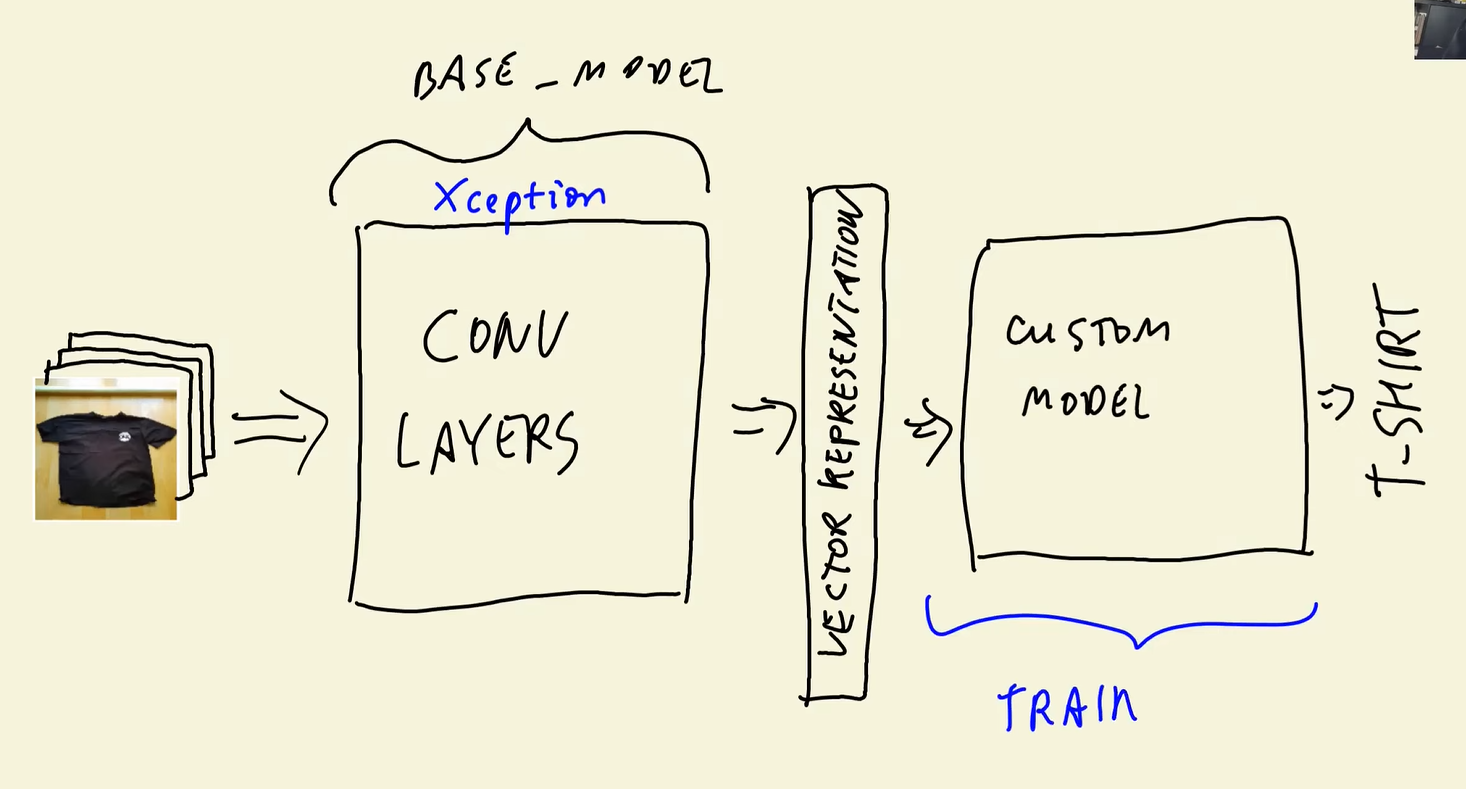
<!-- 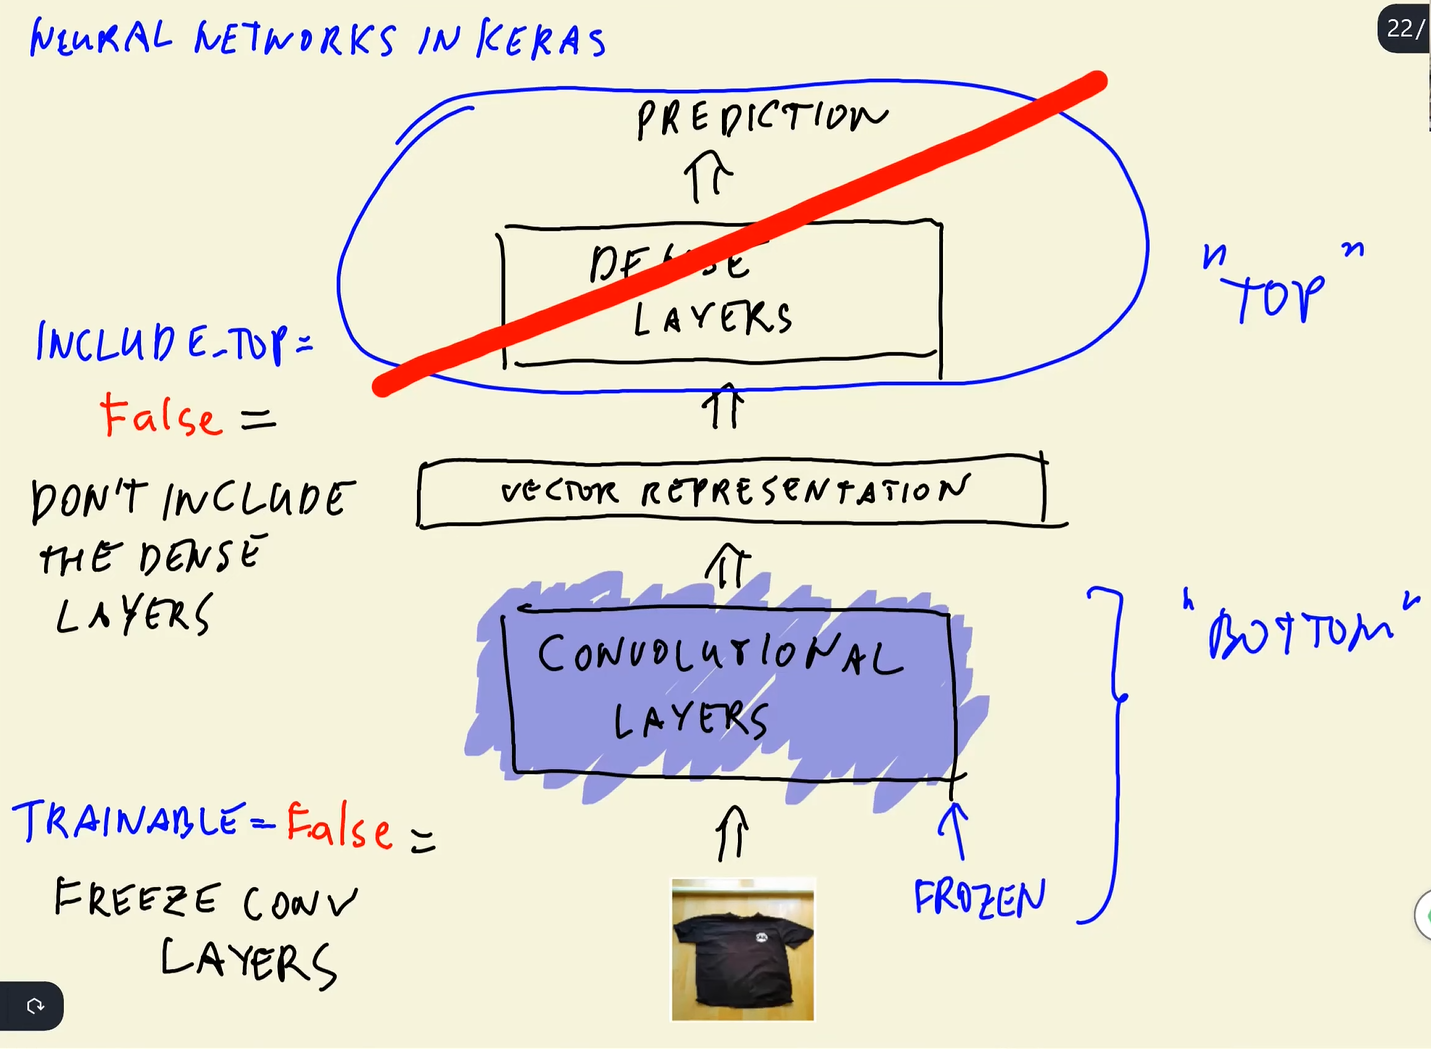 -->
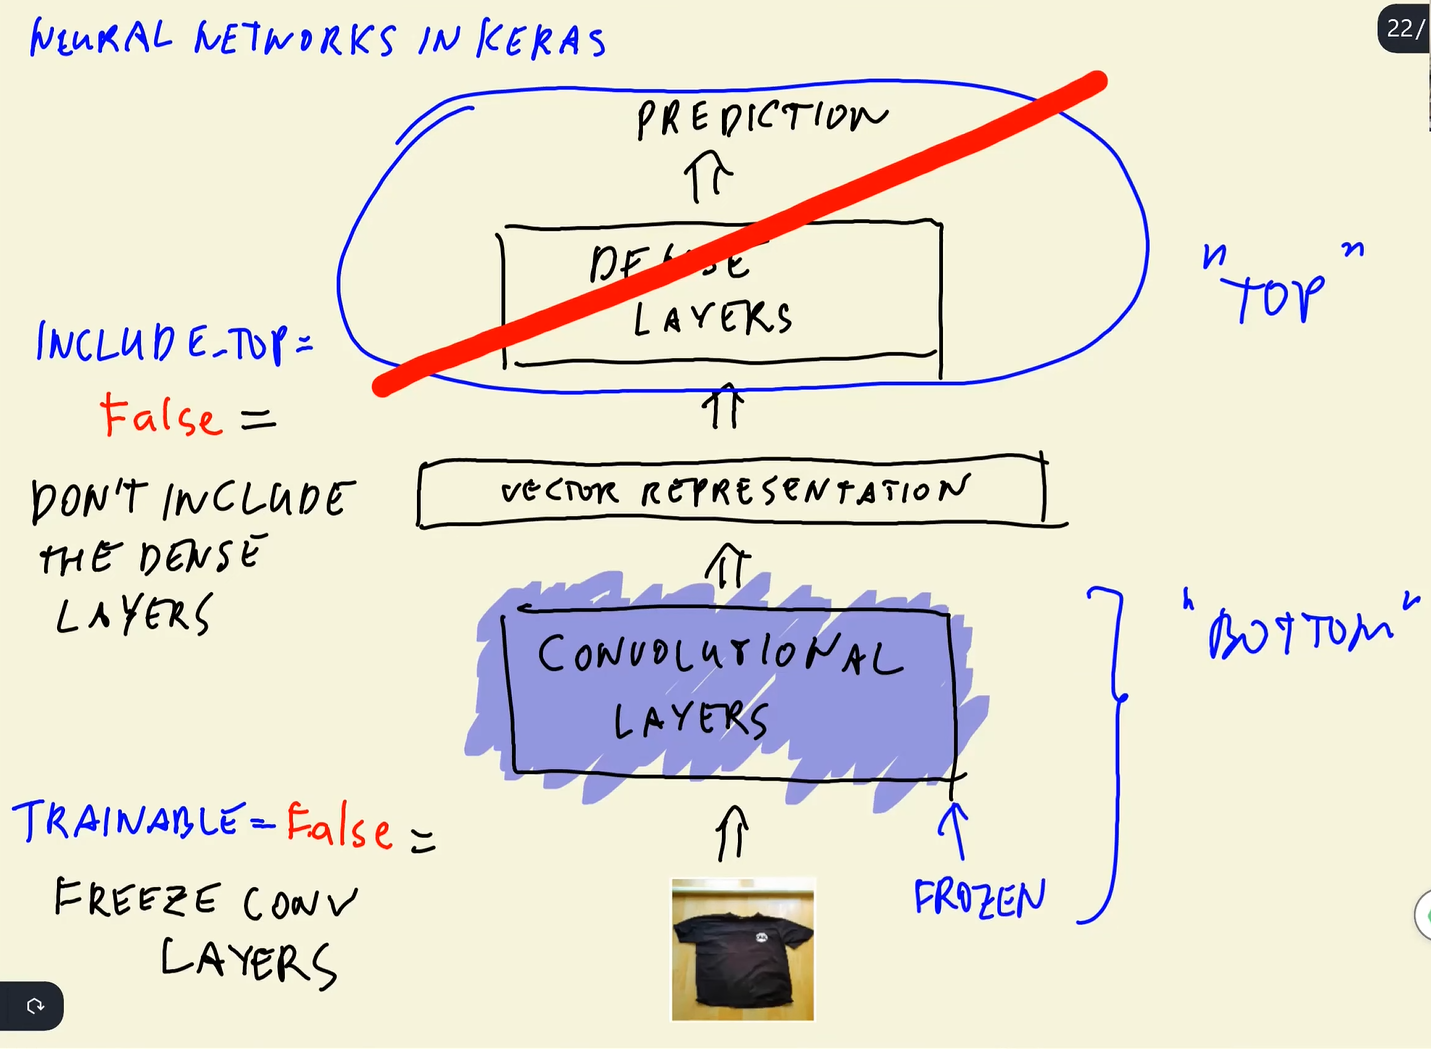


In [ ]:
base_model = Xception(weights = 'imagenet', include_top = False, input_shape=(150,150,3))

base_model.trainable = False
# this means that when we train our model, we do not want to change the Convolutional layers

<img src="attachment:48e4eabf-8c9e-4709-85a5-bd412194fe45.png" width="500">

In [19]:
inputs = keras.Input(shape=(150,150,3))

base = base_model(inputs, training=False)

pooling = keras.layers.GlobalAveragePooling2D()
vectors = pooling(base)

# 10 because we have 10 classes
outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [ ]:
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [21]:
preds.shape



(32, 10)

<img src="attachment:58de6c8d-cf3d-4430-8140-ea6c30404bfd.png" width='500'>

In [22]:
# to learn about more optimizers -> keras.io/api/optimizers
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate = learning_rate)

'''
first thing that we need to train a model is optimizers, after that we need to know if the model actually learnt anything or not. 
For that we use loss function.
there are different types -> 
multiclass classification -> CategoricalCrossentropy
binary classification -> BinaryCrossentropy
solving regression -> MeanSquaredError
'''

loss = keras.losses.CategoricalCrossentropy(from_logits=True)




In [23]:
model.compile(optimizer = optimizer, loss=loss, metrics=['accuracy'])

In [24]:
'''
epoc -> how many times over we need to go over our dataset
'''
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 330s 3s/step - accuracy: 0.6701 - loss: 1.2792 - val_accuracy: 0.8435 - val_loss: 0.4376
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8354 - loss: 0.4878

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [25]:
import sys, tensorflow as tf
print("python:", sys.version.split()[0])
print("tf:", tf.__version__)
print("built_with_cuda:", tf.test.is_built_with_cuda())
print("physical_gpus:", tf.config.list_physical_devices('GPU'))


python: 3.11.1
tf: 2.20.0
built_with_cuda: False
physical_gpus: []


#### adjusting learning rate
analogy -> how fast you read the book

<img src='attachment:f36af52a-04ef-4197-b08b-225b6a2acacf.png' width='500'>

In [ ]:
def make_model(learning_rate= 0.01):
    base_model = Xception(weights = 'imagenet', include_top = False, input_shape=(150,150,3))
    base_model.trainable = False

    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)
    # 10 because we have 10 classes
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)    
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer = optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [ ]:
scores = {}

# for lr in [0.0001, 0.001, 0.01, 0.1]:
#     print(lr)
#     model = make_model(lr)
#     history = model.fit(train_ds, epochs=10, validation_data=val_ds)
#     scores[lr] = history.history
#     print()
#     print()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


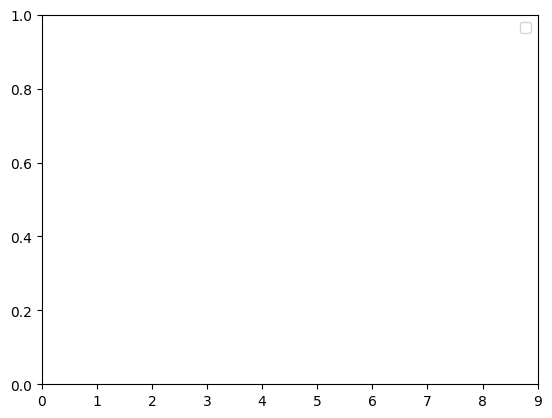

In [27]:
del scores[0.1]
del scores[0.0001]
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)
plt.xticks(np.arange(10))
plt.legend()

In [ ]:
# best learning rate -> 0.001

learning_rate = 0.001


#### Checking pointing
saving models where they perform the best

In [ ]:
'''
for saving keras model we use '.h5' as extension
syntax->
model.save_weights(model_v1.h5, save_format='h5')
'''


model.save_weights(model_v1.h5, save_format='h5')

In [26]:
# save_best_only -> if True, it saves the model if the score is better than the prev epoch. if False, it saves each time
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [32]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - accuracy: 0.5057 - loss: 1.4735

96/96 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.6278 - loss: 1.1052 - val_accuracy: 0.7738 - val_loss: 0.6681
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step - accuracy: 0.7784 - loss: 0.6612

96/96 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.7878 - loss: 0.6269 - val_accuracy: 0.8334 - val_loss: 0.5119
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.8299 - loss: 0.5234

96/96 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.8279 - loss: 0.5101 - val_accuracy: 0.8699 - val_loss: 0.4184
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 750ms/step - accuracy: 0.8805 - loss: 0.4186

96/96 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.8628 - loss: 0.4275 - val_accuracy: 0.8944 - val_loss: 0.3655
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 733ms/step - accuracy: 0.8812 - loss: 0.3782

96/96 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.8840 - loss: 0.3705 - val_accuracy: 0.9149 - val_loss: 0.3173
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.9058 - loss: 0.3275 - val_accuracy: 0.9140 - val_loss: 0.3009
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 654ms/step - accuracy: 0.9130 - loss: 0.2949

96/96 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.9133 - loss: 0.2942 - val_accuracy: 0.9423 - val_loss: 0.2512
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - accuracy: 0.9397 - loss: 0.2616

96/96 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9319 - loss: 0.2608 - val_accuracy: 0.9443 - val_loss: 0.2254
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 635ms/step - accuracy: 0.9451 - loss: 0.2228

96/96 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9433 - loss: 0.2333 - val_accuracy: 0.9602 - val_loss: 0.1985
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.9511 - loss: 0.2094 - val_accuracy: 0.9459 - val_loss: 0.2053


#### Adding more layers

In [31]:
def make_model(learning_rate= 0.01, inner_size = 100):
    base_model = Xception(weights = 'imagenet', include_top = False, input_shape=(150,150,3))
    base_model.trainable = False

    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)
    # in nn, each layer should have some activations in order to achive better performance
    inner = keras.layers.Dense(inner_size, activation='relu')(vectors)
    
    # 10 because we have 10 classes
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)

    
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)    
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer = optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [32]:
learning_rate = 0.001
scores = {}

for size in [10,100,1000]:
    print(size)
    model = make_model(learning_rate = learning_rate, inner_size = size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    print()
    print()

In [33]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=size)
plt.xticks(np.arange(10))
plt.legend()

#### Regularization and dropout
drop out -> basically mimics hiding the part of the image. so for each epoch, the model see a variation of the same image, so it doesnt learn the logos and stuff

<img src='attachment:2012632a-25a3-4595-b3ef-80bc1e4b36a8.png' width='500'>
<img src='attachment:e459ca3c-819b-4be2-81e8-2104c2de78a8.png' width='500'>

In [27]:
def make_model(learning_rate= 0.01, inner_size = 100, droprate=0.5):
    base_model = Xception(weights = 'imagenet', include_top = False, input_shape=(150,150,3))
    base_model.trainable = False

    ####################################################
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    pooling = keras.layers.GlobalAveragePooling2D()
    vectors = pooling(base)
    # in nn, each layer should have some activations in order to achive better performance
    inner = keras.layers.Dense(inner_size, activation='relu')(vectors)
    ###
    drop = keras.layers.Dropout(droprate)(inner)
    # 10 because we have 10 classes
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)

    ####################################################
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate)    
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer = optimizer, loss=loss, metrics=['accuracy'])
    
    return model

<img src='attachment:9203803c-afa1-4176-9360-8d52d2a68e74.png' width='500'>

In [ ]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

In [ ]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

#### Data augmentation
Similar to dropout method -> where we hide part of image -> here we generate new images from existing ones

possible image tranformations ->
1. Flip image [horizontally/vertically]
2. rotation
3. shifting -> height/width
4. shear -> <img src='attachment:5f94beb6-5380-4a94-ad2c-abb50332b42a.png' width='150'>
5. zoom -> shrink/zoom
6. brightness/contrast
7.  ......

we can combine all of the above together as well

<img src='attachment:033d69c1-bf58-4fa2-8499-53a2d0940e01.png' width='250'>

In [34]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    vertical_flip=True,
    shear_range=10.0,
    zoom_range=0.1
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [36]:
# !pip install scipy

   ---------------------------------------- 0.0/38.7 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.7 MB 6.3 MB/s eta 0:00:06
   - -------------------------------------- 1.8/38.7 MB 5.0 MB/s eta 0:00:08
   -- ------------------------------------- 2.6/38.7 MB 4.4 MB/s eta 0:00:09
   --- ------------------------------------ 3.4/38.7 MB 4.4 MB/s eta 0:00:09
   ---- ----------------------------------- 3.9/38.7 MB 4.3 MB/s eta 0:00:09
   ---- ----------------------------------- 4.7/38.7 MB 4.0 MB/s eta 0:00:09
   ----- ---------------------------------- 5.5/38.7 MB 3.9 MB/s eta 0:00:09
   ----- ---------------------------------- 5.8/38.7 MB 4.0 MB/s eta 0:00:09
   ------- -------------------------------- 6.8/38.7 MB 3.7 MB/s eta 0:00:09
   ------- -------------------------------- 7.1/38.7 MB 3.4 MB/s eta 0:00:10
   -------- ------------------------------- 8.1/38.7 MB 3.6 MB/s eta 0:00:09
   -------- ------------------------------- 8.7/38.7 MB 3.6 MB/s eta 0:00:09
   ---

In [37]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    inner_size=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 87s 851ms/step - accuracy: 0.5658 - loss: 1.3291 - val_accuracy: 0.7771 - val_loss: 0.7359
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 80s 826ms/step - accuracy: 0.7011 - loss: 0.9021 - val_accuracy: 0.7654 - val_loss: 0.6821
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 84s 871ms/step - accuracy: 0.7353 - loss: 0.7925 - val_accuracy: 0.8006 - val_loss: 0.6457
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 80s 823ms/step - accuracy: 0.7598 - loss: 0.6971 - val_accuracy: 0.7771 - val_loss: 0.6799
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 90s 929ms/step - accuracy: 0.7777 - loss: 0.6607 - val_accuracy: 0.7830 - val_loss: 0.6522
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 824ms/step - accuracy: 0.7927 - loss: 0.5985 - val_accuracy: 0.7859 - val_loss: 0.6089
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 88s 920ms/step - accuracy: 0.8093 - loss: 0.5543 - val_accuracy: 0.7859 - val_loss: 0.6377
Epoch 8/10
68/96 ━━━━━━━━━━━━━━━━━━━━ 23s 823ms/step - accuracy: 0.8139 - loss: 0.5401

KeyboardInterrupt: 

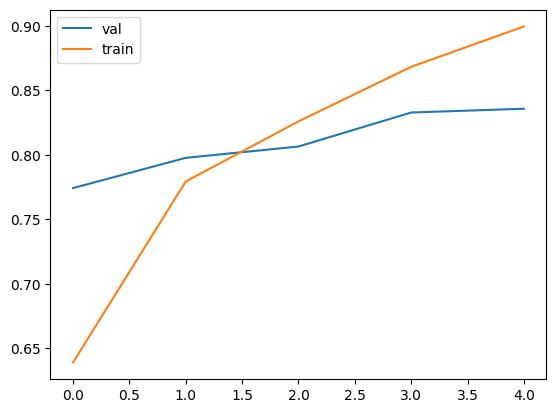

In [38]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

### Training larger model
training 299x299 images

In [39]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [40]:
input_size = 299

In [41]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [42]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [43]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5373 - loss: 1.4075

96/96 ━━━━━━━━━━━━━━━━━━━━ 389s 4s/step - accuracy: 0.6763 - loss: 0.9969 - val_accuracy: 0.8416 - val_loss: 0.5201
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 334s 3s/step - accuracy: 0.8302 - loss: 0.5202 - val_accuracy: 0.8387 - val_loss: 0.4691
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8565 - loss: 0.4500

96/96 ━━━━━━━━━━━━━━━━━━━━ 332s 3s/step - accuracy: 0.8517 - loss: 0.4608 - val_accuracy: 0.8592 - val_loss: 0.3963
Epoch 4/50
 5/96 ━━━━━━━━━━━━━━━━━━━━ 4:49 3s/step - accuracy: 0.8573 - loss: 0.4898

KeyboardInterrupt: 

### loading the model

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
model = keras.models.load_model('xception_v4_1_03_0.859.h5')

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

In [54]:
test_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [55]:
model.evaluate(test_ds)
# returns -> [loss, accuracy]

12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.8925 - loss: 0.3456


[0.345552921295166, 0.8924731016159058]

In [6]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

def predict(path):
    img = load_img(path, target_size = (299,299))

    x = np.array(img)
    X = np.array([x]) 
    
    X = preprocess_input(X)

    pred = model.predict(X)

    pred_list = dict(zip(classes,pred[0]))

    arr = np.array(list(pred_list.items()))
    arr[:,1] = arr[:,1].astype(float)
    sorted_arr = arr[arr[:,1].astype(float).argsort()[::-1]]
    
    return sorted_arr


In [8]:
path = "C:/Users/Rohan/Downloads/pexels-pixabay-35185.jpg"
predict(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([['hat', '3.7992046'],
       ['shoes', '1.443656'],
       ['shirt', '0.37841263'],
       ['pants', '0.2636665'],
       ['t-shirt', '-0.1265326'],
       ['outwear', '-0.57198566'],
       ['shorts', '-0.89124686'],
       ['longsleeve', '-1.4238381'],
       ['dress', '-1.5547395'],
       ['skirt', '-2.3906786']], dtype='<U32')